In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.io import loadmat
import os

# Parameters

In [2]:
fft_size = 2048
fs = 2e6;
num_avg_window = 25
window_size = 501 

# Load & Reshape data

In [3]:
def mylistdir(directory):
    filelist = os.listdir(directory)
    return [x for x in filelist if x.endswith('.bin')] 


### Read in binary file ###
def fread(fid, dtype):
    if dtype is np.str:
        dt = np.uint8  # WARNING: assuming 8-bit ASCII for np.str!
    else:
        dt = dtype
        
    data_array = np.fromfile(fid, dt)
    return data_array


def get_time(x):
    ### Reshape data ###
    T = int(len(x)/fft_size);
    data = np.reshape(x, (fft_size,T), order="F")

    ### Get time ###
    total_time = len(x)*(1/fs)
    bin_duration = fft_size*(1/fs)
    time = np.arange(0.0, total_time-(1/fs), bin_duration)
    return T, time, data

# Compute Averaged Frames

In [4]:
def compute_avg_frames(T, time, data):
    spectra_avg = np.zeros((fft_size, int(np.floor(T)/num_avg_window)))
    count = 0;

    for i in range(0,T-num_avg_window, num_avg_window):
        spectra_avg[:,count] = np.mean(data[:,i:i+num_avg_window-1],axis=1)
        count += 1

    indices = np.arange(0, len(time)-num_avg_window, num_avg_window)
    time = np.take(time, indices)
    return time, spectra_avg, indices


def abs_sum_fft(spectra_avg, fname):
    [rows, columns] = np.shape(spectra_avg)
    signal = np.zeros(columns)

    for i in range(columns):
        signal[i] = np.sum(np.abs(spectra_avg[:,i]))
        
    print(fname + ' First')
    plt.figure(figsize = (15,5))
    plt.plot(time, signal)
    plt.show()
    
    sig_norm = (signal - np.min(signal))/(np.max(signal)-np.min(signal))
    
    for i in range(len(sig_norm)):
        if sig_norm[i] <= 0:
            sig_norm[i] = sig_norm[i+1]
        
    print(fname + ' second')
    plt.figure(figsize = (15,5))
    plt.plot(time, sig_norm)
    plt.show()
    
    
    
    return sig_norm


def plot_sig(time, sig_norm, fname):
    sig_filt = medfilt(sig_norm, window_size)

    plt.figure(figsize = (15,5))
    plt.plot(time, sig_filt)
    plt.savefig(fname + '.png')
    print(fname + '.png')
    plt.show()
    np.savetxt(fname + '.txt', sig_filt)

In [5]:
# path = '/Volumes/USRP/2019-10-07_H6/'
# saveP = '/Volumes/USRP/'
# path = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/H1-2019-09-18/raw_data/'
# saveP = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/H1-2019-09-18/'
# path = '/Users/maggie/Desktop/2019-10-07_H6/'
# saveP = '/Users/maggie/Desktop/Figures/H6'

# path = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/H6_2019-10-17/raw_data'
# SaveP = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/figures'

file_list = mylistdir(path)
print(file_list)

['2019-10-17_1949.bin', '2019-10-17_2011.bin', '2019-10-17_2017.bin', '2019-10-17_2001.bin', '2019-10-17_2033.bin', '2019-10-17_2023.bin']


824242176
824242176
<class 'numpy.ndarray'>
1530189824
705947648
<class 'numpy.ndarray'>
2218911744
688721920
<class 'numpy.ndarray'>
3411548160
1192636416
<class 'numpy.ndarray'>
4164995072
753446912
<class 'numpy.ndarray'>
5336877056
1171881984
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
5336877056
2019-10-17_2023 First


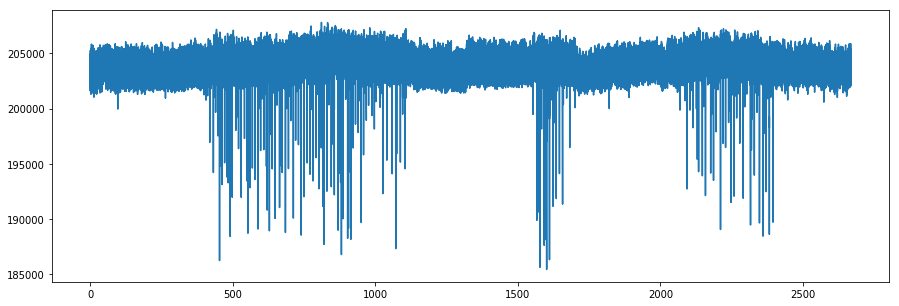

2019-10-17_2023 second


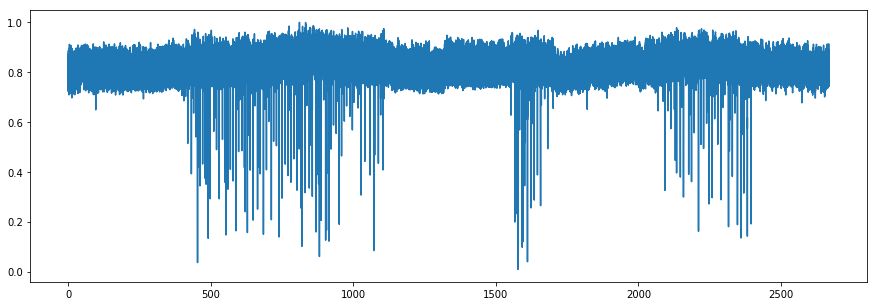

NameError: name 'saveP' is not defined

In [6]:
x = np.empty(0)

for f in file_list:
    fid = open(os.path.join(path, f), 'rb');
    title = f.split('.bin')[0]
    curr_x = fread(fid, 'single')
    x = np.append(x, curr_x)
    print(len(x))
    print(len(curr_x))
    print(type(curr_x))


x = np.array(x)
print(type(x))
print(len(x))
T, time, DATA = get_time(x)
time, spec_avg, ind = compute_avg_frames(T, time, DATA)
signal = abs_sum_fft(spec_avg, title)

save_path = os.path.join(saveP, 'figures')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

fname = os.path.join(save_path, title)
plot_sig(time, signal, fname)
    
    